In [1]:
!pip install psaw
import re
import pandas as pd
import datetime as dt
from psaw import PushshiftAPI

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

api = PushshiftAPI()

### **Getting Reddit data**


In [0]:
gen = api.search_comments(after=int(dt.datetime(2019, 10, 1).timestamp()),
                             before = int(dt.datetime(2019, 11, 30).timestamp()),
                             q = "Fitbit",
                             limit = 10000)


df_fitbit = pd.DataFrame([obj.d_ for obj in gen])

In [3]:
df_fitbit.shape

(9116, 36)

In [0]:
## Adding a filter for comentions with Google, Apple, Samsung, Garmin

df_fitbit['google_mention'] = df_fitbit['body'].str.contains('google', flags=re.IGNORECASE, regex=True)
df_fitbit['apple_mention'] = df_fitbit['body'].str.contains('apple|iwatch', flags=re.IGNORECASE, regex=True)
df_fitbit['samsung_mention'] = df_fitbit['body'].str.contains('samsung', flags=re.IGNORECASE, regex=True)
df_fitbit['garmin_mention'] = df_fitbit['body'].str.contains('garmin', flags=re.IGNORECASE, regex=True)


In [0]:
## Adding the date column

df_fitbit['date'] = pd.to_datetime(df_fitbit['created_utc'],unit='s')
df_fitbit['date'] = df_fitbit['date'].dt.date

In [6]:
df_cleaned = df_fitbit[['date','author','body','subreddit','google_mention','apple_mention','samsung_mention','garmin_mention']]
df_cleaned.head(5)

,date,author,body,subreddit,google_mention,apple_mention,samsung_mention,garmin_mention
0,2019-11-24,PaleoTS,Totally agree on the Fenix. I will never make ...,Garmin,False,False,False,True
1,2019-11-24,trusisbunny,Oh hey same phone.\n\nI got a really good deal...,Nurse,False,False,True,False
2,2019-11-24,The_Head_Shrinker,"Goodness, I meant a generation that hasn't eve...",DunderMifflin,False,True,False,False
3,2019-11-24,miichelleest,Fitbit versa 2! I love mine,Nurse,False,False,False,False
4,2019-11-24,TheInstituteOfSteel,FitBit?,DunderMifflin,False,False,False,False


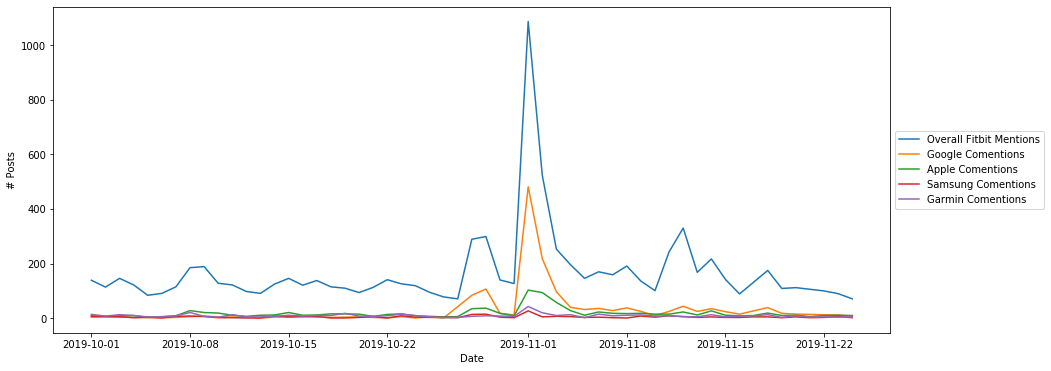

In [7]:
### Trend of comentions between Fitbit and other brands

plt.figure(figsize=(15,6))
plt.plot(df_cleaned.groupby('date')['subreddit'].agg('count'), label = 'Overall Fitbit Mentions')
plt.plot(df_cleaned[df_cleaned['google_mention'] == True].groupby('date')['subreddit'].agg('count'),label = 'Google Comentions' )
plt.plot(df_cleaned[df_cleaned['apple_mention'] == True].groupby('date')['subreddit'].agg('count'),label = 'Apple Comentions' )
plt.plot(df_cleaned[df_cleaned['samsung_mention'] == True].groupby('date')['subreddit'].agg('count'),label = 'Samsung Comentions' )
plt.plot(df_cleaned[df_cleaned['garmin_mention'] == True].groupby('date')['subreddit'].agg('count'),label = 'Garmin Comentions' )
plt.xlabel('Date')
plt.ylabel('# Posts')
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
plt.show()


### **Getting Twitter Data** 

In [8]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
df_tweets = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/All_tweets_data.csv')
df_tweets['text'] = df_tweets['text'].fillna('NA')
df_tweets.shape


(89007, 23)

In [10]:
df_tweets_cleaned = df_tweets[['likes','retweets','text','timestamp','date']]
df_tweets_cleaned.shape

(89007, 5)

In [11]:
df_tweets_cleaned.head(5)

,likes,retweets,text,timestamp,date
0,0.0,0.0,"Fitbit Versa Smart Watch - ""Special Edition"" -...",2019-10-27 23:58:38,2019-10-27
1,0.0,0.0,How did you do that? Do they have food diaries...,2019-10-27 23:58:20,2019-10-27
2,3.0,0.0,BUZZIN to set up my Fitbit and google everythi...,2019-10-27 23:55:38,2019-10-27
3,0.0,0.0,#fitbit #googlefit Top Weekly Games:,2019-10-27 23:55:06,2019-10-27
4,0.0,0.0,I earned a Fitbit Adjustment of 40 calories. #...,2019-10-27 23:54:14,2019-10-27


In [0]:
from datetime import datetime,date

def getdate(d):
  if type(d) == str:
    dt = d.split('-')
    return datetime(int(dt[0]), int(dt[1]),int(dt[2])).date()
  else:
    return d

df_tweets_cleaned['date'] = df_tweets_cleaned['date'].map(getdate)

In [13]:
df_tweets_cleaned.head(5)

,likes,retweets,text,timestamp,date
0,0.0,0.0,"Fitbit Versa Smart Watch - ""Special Edition"" -...",2019-10-27 23:58:38,2019-10-27
1,0.0,0.0,How did you do that? Do they have food diaries...,2019-10-27 23:58:20,2019-10-27
2,3.0,0.0,BUZZIN to set up my Fitbit and google everythi...,2019-10-27 23:55:38,2019-10-27
3,0.0,0.0,#fitbit #googlefit Top Weekly Games:,2019-10-27 23:55:06,2019-10-27
4,0.0,0.0,I earned a Fitbit Adjustment of 40 calories. #...,2019-10-27 23:54:14,2019-10-27


In [0]:
## Adding a filter for comentions with Google, Apple, Samsung, Garmin

df_tweets_cleaned['google_mention'] = df_tweets_cleaned['text'].str.contains('google', flags=re.IGNORECASE, regex=True)
df_tweets_cleaned['apple_mention'] = df_tweets_cleaned['text'].str.contains('apple|iwatch', flags=re.IGNORECASE, regex=True)
df_tweets_cleaned['samsung_mention'] = df_tweets_cleaned['text'].str.contains('samsung', flags=re.IGNORECASE, regex=True)
df_tweets_cleaned['garmin_mention'] = df_tweets_cleaned['text'].str.contains('garmin', flags=re.IGNORECASE, regex=True)



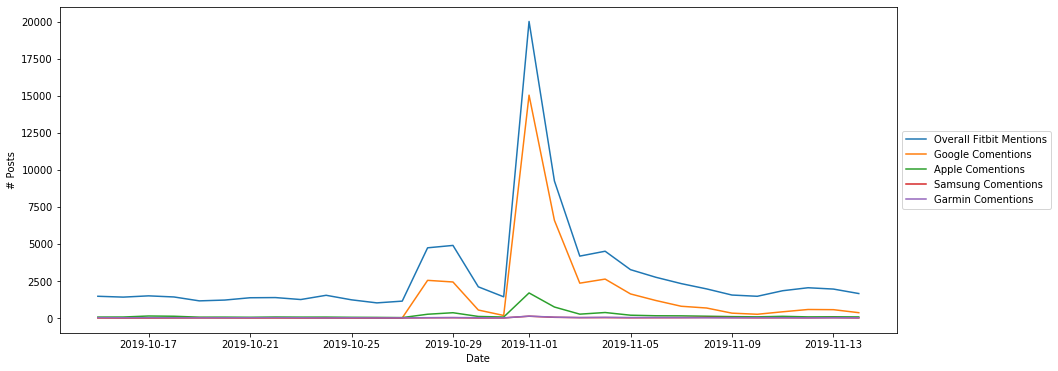

In [15]:
### Trend of comentions between Fitbit and other brands

plt.figure(figsize=(15,6))
plt.plot(df_tweets_cleaned.groupby('date')['text'].agg('count'), label = 'Overall Fitbit Mentions')
plt.plot(df_tweets_cleaned[df_tweets_cleaned['google_mention'] == True].groupby('date')['text'].agg('count'),label = 'Google Comentions' )
plt.plot(df_tweets_cleaned[df_tweets_cleaned['apple_mention'] == True].groupby('date')['text'].agg('count'),label = 'Apple Comentions' )
plt.plot(df_tweets_cleaned[df_tweets_cleaned['samsung_mention'] == True].groupby('date')['text'].agg('count'),label = 'Samsung Comentions' )
plt.plot(df_tweets_cleaned[df_tweets_cleaned['garmin_mention'] == True].groupby('date')['text'].agg('count'),label = 'Garmin Comentions' )
plt.xlabel('Date')
plt.ylabel('# Posts')
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
plt.show()


### **Combining both the Twitter and Reddit data**

In [16]:
df_cleaned.head(5)

,date,author,body,subreddit,google_mention,apple_mention,samsung_mention,garmin_mention
0,2019-11-24,PaleoTS,Totally agree on the Fenix. I will never make ...,Garmin,False,False,False,True
1,2019-11-24,trusisbunny,Oh hey same phone.\n\nI got a really good deal...,Nurse,False,False,True,False
2,2019-11-24,The_Head_Shrinker,"Goodness, I meant a generation that hasn't eve...",DunderMifflin,False,True,False,False
3,2019-11-24,miichelleest,Fitbit versa 2! I love mine,Nurse,False,False,False,False
4,2019-11-24,TheInstituteOfSteel,FitBit?,DunderMifflin,False,False,False,False


In [17]:
df_tweets_cleaned.head(5)

,likes,retweets,text,timestamp,date,google_mention,apple_mention,samsung_mention,garmin_mention
0,0.0,0.0,"Fitbit Versa Smart Watch - ""Special Edition"" -...",2019-10-27 23:58:38,2019-10-27,False,False,False,False
1,0.0,0.0,How did you do that? Do they have food diaries...,2019-10-27 23:58:20,2019-10-27,False,False,False,False
2,3.0,0.0,BUZZIN to set up my Fitbit and google everythi...,2019-10-27 23:55:38,2019-10-27,True,False,False,False
3,0.0,0.0,#fitbit #googlefit Top Weekly Games:,2019-10-27 23:55:06,2019-10-27,True,False,False,False
4,0.0,0.0,I earned a Fitbit Adjustment of 40 calories. #...,2019-10-27 23:54:14,2019-10-27,False,False,False,False


In [18]:
df_main1 = df_cleaned[['date','body','google_mention','apple_mention','samsung_mention','garmin_mention']]
print(df_main1.shape)

df_main2 = df_tweets_cleaned[['date','text','google_mention','apple_mention','samsung_mention','garmin_mention']]
df_main2 = df_main2.rename(columns={"text": "body"})
print(df_main2.shape)

(9116, 6)
(89007, 6)


In [19]:
df_main = pd.concat([df_main1, df_main2], axis=0, sort=False)
df_main = df_main.reset_index()
df_main = df_main.drop(columns="index")
df_main.shape

(98123, 6)

In [0]:
## Adding a flag for dates
## Before the news (till 27th Oct) - the flag is 0
## During the peak period (28th Oct - 2nd Nov) - the flag is 1
## After the peak - the flag is 2

def dateflag(d):
  if type(d) == float:
    return 0
  else:

    if d >= datetime(2019,10,28).date() and d <= datetime(2019,11,2).date() :
      return 1
    elif d >= datetime(2019,11,3).date():
      return 2
    else:
      return 0

df_main['after_news'] = df_main['date'].map(dateflag) 

In [22]:
## Cleaning the text
# https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

import spacy
import nltk
import string
from spacy.lang.en import English
nlp = English()
nltk.download('punkt')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS


def getclean(s):
  try:
    s = s.lower()

    
    ## tokenization
    s = nlp(s)
    token_list = []
    for token in s:
      token_list.append(token.text)
    
    updated_s = []
    for w in token_list:
      w = w.lstrip().rstrip()
      updated_s.append(w)

    ## removing bad characters
    new_list = []
    for w in updated_s:
      if '\n' in w or '\xa0' in w or '..' in w or '!' in w or '。' in w or "  " in w or "“" in w or "…" in w :
        continue
      else:
        new_list.append(w)
    
    ## removing numbers
    non_numbers = []
    for w in new_list:
      try:
        float(w)
      except:
        non_numbers.append(w)


    ## removing stopwords
    filtered_words=[]
    for word in non_numbers:
      if word in spacy_stopwords:
        continue
      else:
          filtered_words.append(word)

    ## lemmatization
    doc = nlp(' '.join(filtered_words))
    lemmatized = []
    for word in doc:
      lemmatized.append(word.lemma_)
    

    ## removing punctuations
    final_list =  []
    for w in lemmatized:
      w_clean = w.translate(str.maketrans('', '',string.punctuation))
      if len(w_clean) >=3:
        final_list.append(w_clean)
    
    return final_list
  
  except:
    return s


df_main['cleaned_text'] = df_main['body'].map(getclean)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
df_main.head(5)

,date,body,google_mention,apple_mention,samsung_mention,garmin_mention,after_news,cleaned_text
0,2019-11-24,Totally agree on the Fenix. I will never make ...,False,False,False,True,2,"[totally, agree, fenix, argument, worth, far, ..."
1,2019-11-24,Oh hey same phone.\n\nI got a really good deal...,False,False,True,False,2,"[hey, phone, get, good, deal, samsung, galaxy,..."
2,2019-11-24,"Goodness, I meant a generation that hasn't eve...",False,True,False,False,2,"[goodness, mean, generation, bear, fact, reaso..."
3,2019-11-24,Fitbit versa 2! I love mine,False,False,False,False,2,"[fitbit, versa, love]"
4,2019-11-24,FitBit?,False,False,False,False,2,[fitbit]


### **Word Clouds**

https://www.datacamp.com/community/tutorials/wordcloud-python

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
def getstr(l):
  try:
    return ' '.join(l)
  except:
    return l

df_main['cleaned_string'] = df_main['cleaned_text'].map(getstr)
df_main.head(5)

,date,body,google_mention,apple_mention,samsung_mention,garmin_mention,after_news,cleaned_text,cleaned_string
0,2019-11-24,Totally agree on the Fenix. I will never make ...,False,False,False,True,2,"[totally, agree, fenix, argument, worth, far, ...",totally agree fenix argument worth far happy a...
1,2019-11-24,Oh hey same phone.\n\nI got a really good deal...,False,False,True,False,2,"[hey, phone, get, good, deal, samsung, galaxy,...",hey phone get good deal samsung galaxy watch r...
2,2019-11-24,"Goodness, I meant a generation that hasn't eve...",False,True,False,False,2,"[goodness, mean, generation, bear, fact, reaso...",goodness mean generation bear fact reason post...
3,2019-11-24,Fitbit versa 2! I love mine,False,False,False,False,2,"[fitbit, versa, love]",fitbit versa love
4,2019-11-24,FitBit?,False,False,False,False,2,[fitbit],fitbit


In [0]:
## Before the acquisition was announced

text_before_news = df_main[df_main['after_news'] == 0]['cleaned_string'].sum()


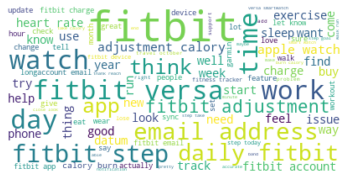

In [34]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations=True).generate(text_before_news)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
wordcloud.to_file("/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/before_news_wordcloud.png")

In [0]:
## When the acquisition was announced

text_after_news = df_main[df_main['after_news'] == 1]['cleaned_string'].sum()


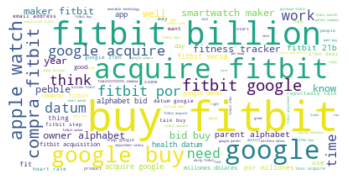

In [47]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations=True).generate(text_after_news)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
wordcloud.to_file("/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/after_news_wordcloud.png")

In [0]:
## After the acquisition was announced

text_later = df_main[df_main['after_news'] == 2]['cleaned_string'].sum()


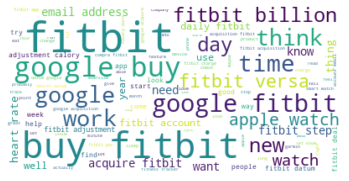

In [46]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations=True).generate(text_later)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
wordcloud.to_file("/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/after_peak_wordcloud.png")

### **Observations from the Word Cloud**:

1.   In the pre-period, people are mostly talking about Fitbit features and the      app
2.   In the peak-period, the entire talk is about the acquisition and Google.        We see 'Apple Watch' entering the conversations.
3.   In the post-period, although most of the talk is still about the acquisition, we do see conversations about the Fitbit features coming up 



### **Topic Modelling- Before, During and After**

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary


In [0]:
## Before announcement

dictionary_before = gensim.corpora.Dictionary(df_main[df_main['after_news'] == 0].cleaned_text)

dictionary_before.filter_extremes(no_below=1, no_above=0.7) #, keep_n=100000)

In [0]:
bow_corpus_before = [dictionary_before.doc2bow(words) for words in df_main[df_main['after_news'] == 0].cleaned_text]


In [0]:
lda_model_before = gensim.models.LdaMulticore(bow_corpus_before, num_topics=6, id2word=dictionary_before, passes=2, workers=2, chunksize=100, random_state=1000)


In [127]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_model_before.print_topics())


[   (   0,
        '0.042*"versa" + 0.018*"fitness" + 0.018*"watch" + 0.015*"band" + '
        '0.013*"smartwatch" + 0.011*"apple" + 0.007*"que" + 0.007*"smart" + '
        '0.006*"lite" + 0.006*"ios"'),
    (   1,
        '0.019*"sleep" + 0.015*"get" + 0.012*"day" + 0.012*"like" + '
        '0.011*"watch" + 0.010*"time" + 0.010*"track" + 0.009*"loseit" + '
        '0.009*"apple" + 0.008*"heart"'),
    (   2,
        '0.105*"step" + 0.050*"goal" + 0.049*"calory" + 0.041*"achieve" + '
        '0.039*"october" + 0.031*"daily" + 0.029*"earn" + 0.028*"burn" + '
        '0.025*"take" + 0.023*"adjustment"'),
    (   3,
        '0.026*"email" + 0.025*"hello" + 0.021*"address" + 0.021*"thank" + '
        '0.017*"account" + '
        '0.016*"httpstwittercommessagescomposerecipientid476258341" + '
        '0.016*"help" + 0.016*"let" + 0.015*"app" + 0.015*"device"'),
    (   4,
        '0.017*"win" + 0.015*"versa" + 0.010*"watch" + 0.009*"garmin" + '
        '0.008*"alexa" + 0.007*"smartwatch" + 



1.   Topic0  - Discussion about different models
2.   Topic1 - Generic wear and tear stuff
3.   Topic2 - Fitbit Benefits
4.   Topic3 - App & Watch options 
5.   Topic4 - Discussion about competition
6.   Topic5 - Discussion about health benefits and partnerships




In [0]:
words = list(set([i for l in df_main[df_main['after_news'] == 0].cleaned_text for i in l]))

word_loadings = pd.DataFrame(words, columns=['word'])
word_loadings['topic_0'] = 0.0
word_loadings['topic_1'] = 0.0
word_loadings['topic_2'] = 0.0
word_loadings['topic_3'] = 0.0
word_loadings['topic_4'] = 0.0
word_loadings['topic_5'] = 0.0

In [129]:
for index, row in word_loadings.iterrows():
  try:
    w = lda_model_before.get_term_topics(row['word'], minimum_probability=0.000001)
    word_loadings['topic_0'].loc[index]  = w[0][1]
    word_loadings['topic_1'].loc[index]  = w[1][1]
    word_loadings['topic_2'].loc[index]  = w[2][1]
    word_loadings['topic_3'].loc[index]  = w[3][1]
    word_loadings['topic_4'].loc[index]  = w[4][1]
    word_loadings['topic_5'].loc[index]  = w[5][1]
  except:
    pass

word_loadings.shape


(31442, 7)

In [136]:
print(word_loadings.head(5))
word_loadings.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/word_loadings_prenews')

                     word   topic_0   topic_1  ...  topic_3  topic_4  topic_5
0                    send  0.005178  0.000000  ...      0.0      0.0      0.0
1  httpsbitstatsnetbadges  0.000001  0.000003  ...      0.0      0.0      0.0
2                singular  0.000005  0.000000  ...      0.0      0.0      0.0
3         montreconnectee  0.000000  0.000000  ...      0.0      0.0      0.0
4                 upやらすねん  0.000239  0.000000  ...      0.0      0.0      0.0

[5 rows x 7 columns]


In [137]:
df_topics_pre = df_main[df_main['after_news'] == 0].copy(deep=True)

df_topics_pre['topic_0'] = 0.0
df_topics_pre['topic_1'] = 0.0
df_topics_pre['topic_2'] = 0.0
df_topics_pre['topic_3'] = 0.0
df_topics_pre['topic_4'] = 0.0
df_topics_pre['topic_5'] = 0.0

print(df_main.shape)
print(df_topics_pre.shape)

(98123, 9)
(20311, 15)


In [0]:
for index, row in df_topics_pre.iterrows():
    bow = dictionary_before.doc2bow(row['cleaned_text'])
    t = lda_model_before.get_document_topics(bow)
    for i in range(len(t)):
      if t[i][0] == 0:
        df_topics_pre['topic_0'].loc[index] = t[i][1]
      elif t[i][0] == 1:
        df_topics_pre['topic_1'].loc[index] = t[i][1]
      elif t[i][0] == 2:
        df_topics_pre['topic_2'].loc[index] = t[i][1]
      elif t[i][0] == 3:
        df_topics_pre['topic_3'].loc[index] = t[i][1]
      elif t[i][0] == 4:
        df_topics_pre['topic_4'].loc[index] = t[i][1]
      else:
        df_topics_pre['topic_5'].loc[index] = t[i][1]        

In [150]:
print(df_topics_pre.shape)
df_topics_pre.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/topic_loadings_prenews')

(20311, 15)


### During the peak

In [0]:
## After announcement - taking the tweets/reddit posts only from 3rd November. Lot of noise might be there in the first 2 days

dictionary_during = gensim.corpora.Dictionary(df_main[df_main['after_news'] == 1].cleaned_text)

dictionary_during.filter_extremes(no_below=1, no_above=0.7) #, keep_n=100000)

In [0]:
bow_corpus_during = [dictionary_during.doc2bow(words) for words in df_main[df_main['after_news'] == 1].cleaned_text]


In [0]:
lda_model_during = gensim.models.LdaMulticore(bow_corpus_during, num_topics=4, id2word=dictionary_during, passes=2, workers=2, chunksize=100, random_state=1000)


In [154]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_model_during.print_topics())


[   (   0,
        '0.028*"step" + 0.013*"pebble" + 0.011*"goal" + 0.010*"fit" + '
        '0.010*"take" + 0.009*"achieve" + 0.008*"googl" + 0.008*"goog" + '
        '0.008*"october" + 0.008*"burn"'),
    (   1,
        '0.057*"google" + 0.022*"por" + 0.022*"compra" + 0.016*"millones" + '
        '0.013*"news" + 0.011*"dólares" + 0.009*"que" + 0.008*"stock" + '
        '0.008*"httpstwittercomgooglestatus1190253069352628230" + '
        '0.007*"google、fitbitを約21億ドルで買収"'),
    (   2,
        '0.033*"google" + 0.021*"datum" + 0.012*"watch" + 0.009*"health" + '
        '0.008*"apple" + 0.007*"know" + 0.007*"like" + 0.007*"get" + '
        '0.006*"time" + 0.006*"device"'),
    (   3,
        '0.149*"google" + 0.074*"buy" + 0.068*"billion" + 0.048*"acquire" + '
        '0.018*"deal" + 0.017*"wearables" + 0.011*"maker" + 0.010*"smartwatch" '
        '+ 0.010*"value" + 0.009*"alphabet"')]


1.   Topic0  - Fitbit Features
2.   Topic1 - About Google Acquisition - other Languages
3.   Topic2 - Talking about benefits of acquisition and comparing with apple (?)
4.   Topic3 - Google Acquisition.

During the peak period, most of the talk is regarding Google and the acquisition.

PS: We are getting better results with num_topics = 3

In [0]:
words = list(set([i for l in df_main[df_main['after_news'] == 1].cleaned_text for i in l]))

word_loadings = pd.DataFrame(words, columns=['word'])
word_loadings['topic_0'] = 0.0
word_loadings['topic_1'] = 0.0
word_loadings['topic_2'] = 0.0
word_loadings['topic_3'] = 0.0


In [161]:
for index, row in word_loadings.iterrows():
  try:
    w = lda_model_during.get_term_topics(row['word'], minimum_probability=0.000001)
    word_loadings['topic_0'].loc[index]  = w[0][1]
    word_loadings['topic_1'].loc[index]  = w[1][1]
    word_loadings['topic_2'].loc[index]  = w[2][1]
    word_loadings['topic_3'].loc[index]  = w[3][1]
  except:
    pass

word_loadings.shape


(60565, 5)

In [162]:
print(word_loadings.head(5))
word_loadings.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/word_loadings_duringpeak')

                                                word  ...  topic_3
0                                               send  ...      0.0
1                                            massago  ...      0.0
2                                           singular  ...      0.0
3  httpswwwversion2dkartikelyderligere29danskepen...  ...      0.0
4                                              歩（051  ...      0.0

[5 rows x 5 columns]


In [163]:
df_topics_peak = df_main[df_main['after_news'] == 1].copy(deep=True)

df_topics_peak['topic_0'] = 0.0
df_topics_peak['topic_1'] = 0.0
df_topics_peak['topic_2'] = 0.0
df_topics_peak['topic_3'] = 0.0

print(df_main.shape)
print(df_topics_peak.shape)

(98123, 9)
(44885, 13)


In [0]:
for index, row in df_topics_peak.iterrows():
    bow = dictionary_during.doc2bow(row['cleaned_text'])
    t = lda_model_during .get_document_topics(bow)
    for i in range(len(t)):
      if t[i][0] == 0:
        df_topics_peak['topic_0'].loc[index] = t[i][1]
      elif t[i][0] == 1:
        df_topics_peak['topic_1'].loc[index] = t[i][1]
      elif t[i][0] == 2:
        df_topics_peak['topic_2'].loc[index] = t[i][1]
      else :
        df_topics_peak['topic_3'].loc[index] = t[i][1]


In [170]:
print(df_topics_peak.shape)
df_topics_peak.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/topic_loadings_during')

(44885, 13)


#### Post the news

In [172]:
df_after = df_main[(df_main['after_news'] == 2) & (df_main['date'] >= (datetime(2019,11,3).date())) & (df_main['date'] <= (datetime(2019,11,15).date()))]
df_after.shape
#  <= datetime(2019,11,05).date() 

(31943, 9)

In [0]:
## After announcement - taking the tweets/reddit posts only from 3rd November. Lot of noise might be there in the first 2 days

dictionary_after = gensim.corpora.Dictionary(df_after.cleaned_text)

dictionary_after.filter_extremes(no_below=1, no_above=0.7) #, keep_n=100000)

In [0]:
bow_corpus_after = [dictionary_after.doc2bow(words) for words in df_after.cleaned_text]


In [0]:
lda_model_after = gensim.models.LdaMulticore(bow_corpus_after, num_topics=4, id2word=dictionary_after, passes=2, workers=2, chunksize=100, random_state=1000)


In [176]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_model_after.print_topics())


[   (   0,
        '0.048*"google" + 0.013*"por" + 0.010*"compra" + 0.008*"que" + '
        '0.007*"millones" + 0.005*"para" + 0.005*"los" + 0.005*"pour" + '
        '0.005*"dollar" + 0.004*"dólares"'),
    (   1,
        '0.017*"versa" + 0.014*"hello" + 0.012*"email" + 0.011*"thank" + '
        '0.011*"account" + 0.009*"charge" + 0.008*"let" + 0.008*"address" + '
        '0.008*"help" + 0.008*"check"'),
    (   2,
        '0.025*"step" + 0.011*"get" + 0.010*"watch" + 0.010*"calory" + '
        '0.009*"goal" + 0.009*"take" + 0.008*"day" + 0.008*"burn" + '
        '0.008*"sleep" + 0.008*"november"'),
    (   3,
        '0.108*"google" + 0.048*"buy" + 0.024*"datum" + 0.021*"billion" + '
        '0.014*"wearables" + 0.012*"acquire" + 0.011*"acquisition" + '
        '0.011*"health" + 0.010*"deal" + 0.009*"privacy"')]


1.   Topic0  - About google acquisition - Other Languages-  lol
2.   Topic1 - App & Watch options
3.   Topic2 - Fitbit Features
4.   Topic3 - Google Acquisition. We see that word 'Privacy' come in here

In the post period, the news about Google is too dominating that basically we are not able to pickup any other topics


In [0]:
words = list(set([i for l in df_after.cleaned_text for i in l]))

word_loadings = pd.DataFrame(words, columns=['word'])
word_loadings['topic_0'] = 0.0
word_loadings['topic_1'] = 0.0
word_loadings['topic_2'] = 0.0
word_loadings['topic_3'] = 0.0


In [178]:
for index, row in word_loadings.iterrows():
  try:
    w = lda_model_after.get_term_topics(row['word'], minimum_probability=0.000001)
    word_loadings['topic_0'].loc[index]  = w[0][1]
    word_loadings['topic_1'].loc[index]  = w[1][1]
    word_loadings['topic_2'].loc[index]  = w[2][1]
    word_loadings['topic_3'].loc[index]  = w[3][1]
    word_loadings['topic_4'].loc[index]  = w[4][1]
    word_loadings['topic_5'].loc[index]  = w[5][1]
  except:
    pass

word_loadings.shape


(53271, 5)

In [179]:
print(word_loadings.head(5))
word_loadings.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/word_loadings_postnews')

                                                word  ...  topic_3
0                                               send  ...      0.0
1                                            massago  ...      0.0
2                             httpsbitstatsnetbadges  ...      0.0
3                           freeappshttpsappslicedco  ...      0.0
4  httpswwwverbraucherzentralebremendeaktuellemel...  ...      0.0

[5 rows x 5 columns]


In [180]:
df_topics_post = df_after.copy(deep=True)

df_topics_post['topic_0'] = 0.0
df_topics_post['topic_1'] = 0.0
df_topics_post['topic_2'] = 0.0
df_topics_post['topic_3'] = 0.0

print(df_main.shape)
print(df_topics_post.shape)

(98123, 9)
(31943, 13)


In [0]:
for index, row in df_topics_post.iterrows():
    bow = dictionary_during.doc2bow(row['cleaned_text'])
    t = lda_model_during .get_document_topics(bow)
    for i in range(len(t)):
      if t[i][0] == 0:
        df_topics_post['topic_0'].loc[index] = t[i][1]
      elif t[i][0] == 1:
        df_topics_post['topic_1'].loc[index] = t[i][1]
      elif t[i][0] == 2:
        df_topics_post['topic_2'].loc[index] = t[i][1]
      else :
        df_topics_post['topic_3'].loc[index] = t[i][1]


In [182]:
print(df_topics_post.shape)
df_topics_post.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/topic_loadings_post')

(31943, 13)


### Getting the topic loadings for all rows

In [183]:
print(df_topics_pre.shape)
print(df_topics_peak.shape)
print(df_topics_post.shape)
print(df_main.shape)

(20311, 15)
(44885, 13)
(31943, 13)
(98123, 9)


In [185]:
df_main.head(5)

,date,body,google_mention,apple_mention,samsung_mention,garmin_mention,after_news,cleaned_text,cleaned_string
0,2019-11-24,Totally agree on the Fenix. I will never make ...,False,False,False,True,2,"[totally, agree, fenix, argument, worth, far, ...",totally agree fenix argument worth far happy a...
1,2019-11-24,Oh hey same phone.\n\nI got a really good deal...,False,False,True,False,2,"[hey, phone, get, good, deal, samsung, galaxy,...",hey phone get good deal samsung galaxy watch r...
2,2019-11-24,"Goodness, I meant a generation that hasn't eve...",False,True,False,False,2,"[goodness, mean, generation, bear, fact, reaso...",goodness mean generation bear fact reason post...
3,2019-11-24,Fitbit versa 2! I love mine,False,False,False,False,2,"[fitbit, versa, love]",fitbit versa love
4,2019-11-24,FitBit?,False,False,False,False,2,[fitbit],fitbit


In [198]:
df_agg = pd.concat([df_topics_pre, df_topics_peak,df_topics_post], axis=0, sort=False)
df_agg = df_agg.reset_index()
df_agg = df_agg.drop(columns="index")
df_agg.shape

(97139, 15)

In [199]:
df_agg.head(5)

,date,body,google_mention,apple_mention,samsung_mention,garmin_mention,after_news,cleaned_text,cleaned_string,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,2019-10-27,You could try FitBit which is really nice for ...,False,True,True,False,0,"[try, fitbit, nice, sleep, track, fitness, ori...",try fitbit nice sleep track fitness orient sma...,0.593730,0.593731,0.167738,0.225635,0.167742,0.000000
1,2019-10-27,I can't help you with your streaming questions...,False,False,False,False,0,"[help, stream, question, track, medical, reaso...",help stream question track medical reason fitb...,0.000000,0.539829,0.051187,0.262217,0.000000,0.139348
2,2019-10-27,"Honestly, I'm worried how he looks may actuall...",False,False,False,False,0,"[honestly, worry, look, actually, medical, iss...",honestly worry look actually medical issue eat...,0.000000,0.951215,0.000000,0.030699,0.000000,0.000000
3,2019-10-27,That's the strange thing. From what I can tell...,False,False,False,False,0,"[strange, thing, tell, probably, weigh, descri...",strange thing tell probably weigh describe ski...,0.000000,0.888474,0.073087,0.026793,0.000000,0.000000
4,2019-10-27,Kind of now that I looked it up. I just said F...,False,False,False,False,0,"[kind, look, say, fitbit, early, think]",kind look say fitbit early think,0.027778,0.860558,0.027779,0.028070,0.027779,0.028036


In [0]:
df_agg.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/With_Topic_Loadings.csv')